<a href="https://colab.research.google.com/github/shatabdi-sikta/heart-disease-analysis-pipeline/blob/main/Health_Data_ETL_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Heart Disease Prediction Pipeline

## Project Overview
This project analyzes clinical heart disease data to identify key risk factors.
It includes:
1. **ETL Process:** Loading and cleaning raw UCI data.
2. **Exploratory Data Analysis (EDA):** Visualizing correlations between Age, Cholesterol, and Heart Disease.
3. **Machine Learning:** A Random Forest Classifier to predict disease presence.
4. **Explainability:** Feature Importance analysis to understand *why* the model predicts risk.




In [27]:
!pip install sqlalchemy pandas scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import logging
import os

In [28]:
DATA_URL = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
DB_NAME = "heart_disease.db"
TABLE_NAME = "heart_disease"


In [29]:
logging.basicConfig(level=logging.INFO, format= '%(asctime)s-%(levelname)s-%(message)s')
logger= logging.getLogger()

In [30]:
def load_data():
    """Simulating SQL Load by getting data from UCI Repository"""
    logger.info("Loading data from URL..")
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach', 'exang','oldpeak', 'slope','ca','thal','target']
    df = pd.read_csv(url, names=columns, na_values="?")
    return df

def transform_data(df):
    """Cleaning the data"""
    logger.info("Transforming data..")

    # --- FIX IS HERE: notice the space before these lines ---
    df = df.fillna(df.mean(numeric_only=True))
    df['target'] = df['target'].apply(lambda x: 1 if x>0 else 0)

    return df



Starting Visualization...


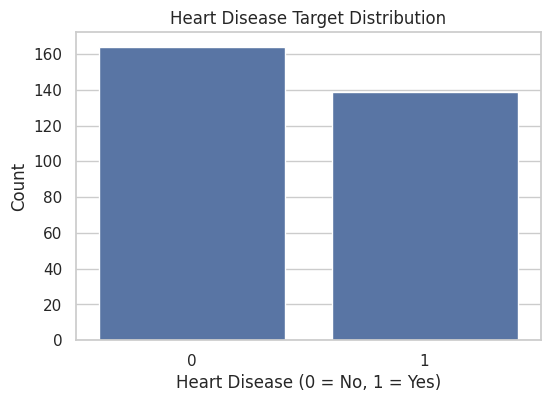

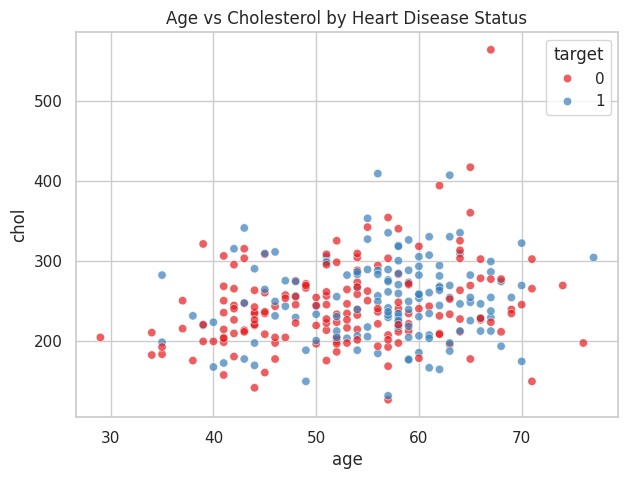

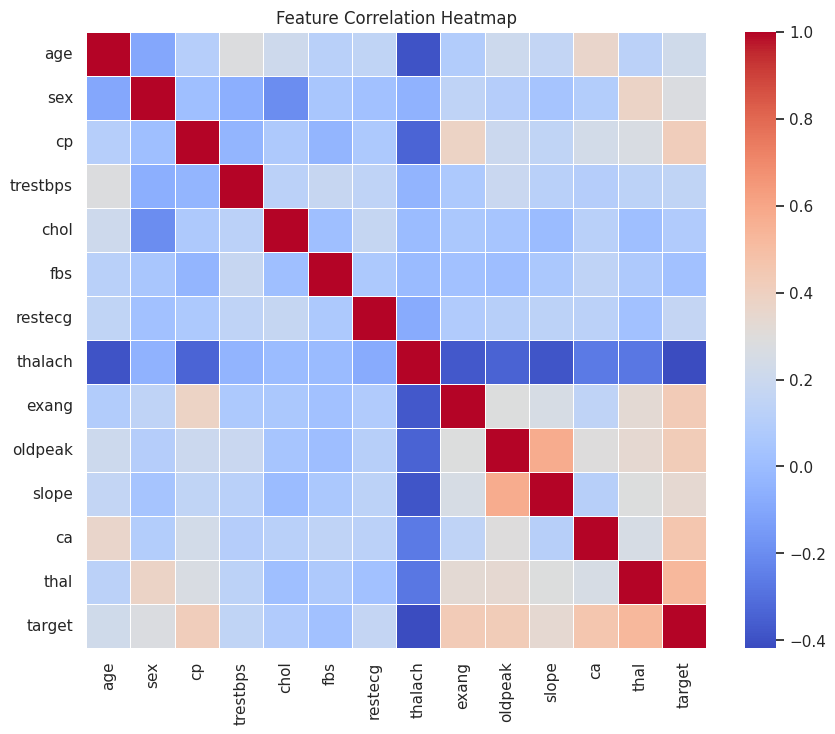

Visualization Complete.


In [37]:
print("Starting Visualization...")

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Target Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x='age',
    y='chol',
    hue='target',
    palette='Set1',
    alpha=0.7
)
plt.title("Age vs Cholesterol by Heart Disease Status")
plt.show()

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

print("Visualization Complete.")

In [41]:
def train_model(df):
    """Trains the model and shows Feature Importance"""
    logger.info("Starting Model Training...")


    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)


    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)


    feature_importance = pd.Series(
        clf.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=feature_importance.values,
        y=feature_importance.index,
        palette="viridis"
    )
    plt.title("Feature Importance - Random Forest Model")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    # -----------------------------------------------------

    logger.info(f"Model Training Complete. Accuracy: {acc:.4f}")
    return acc

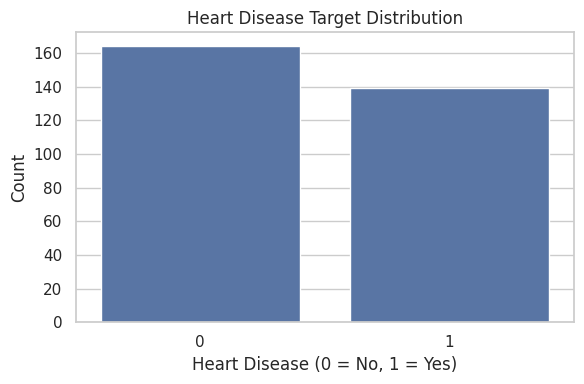

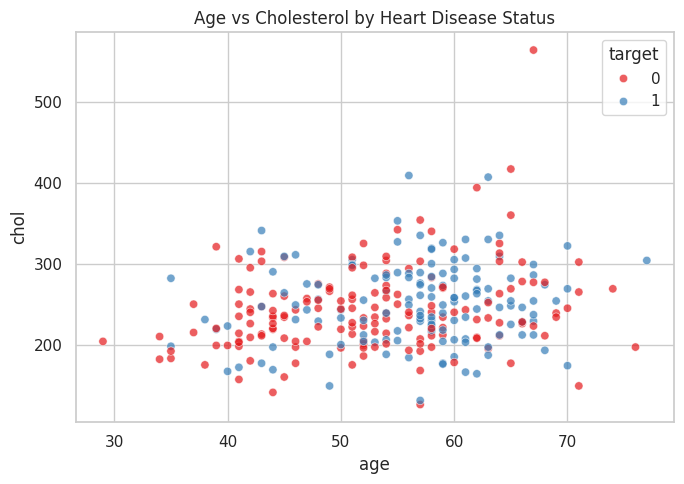

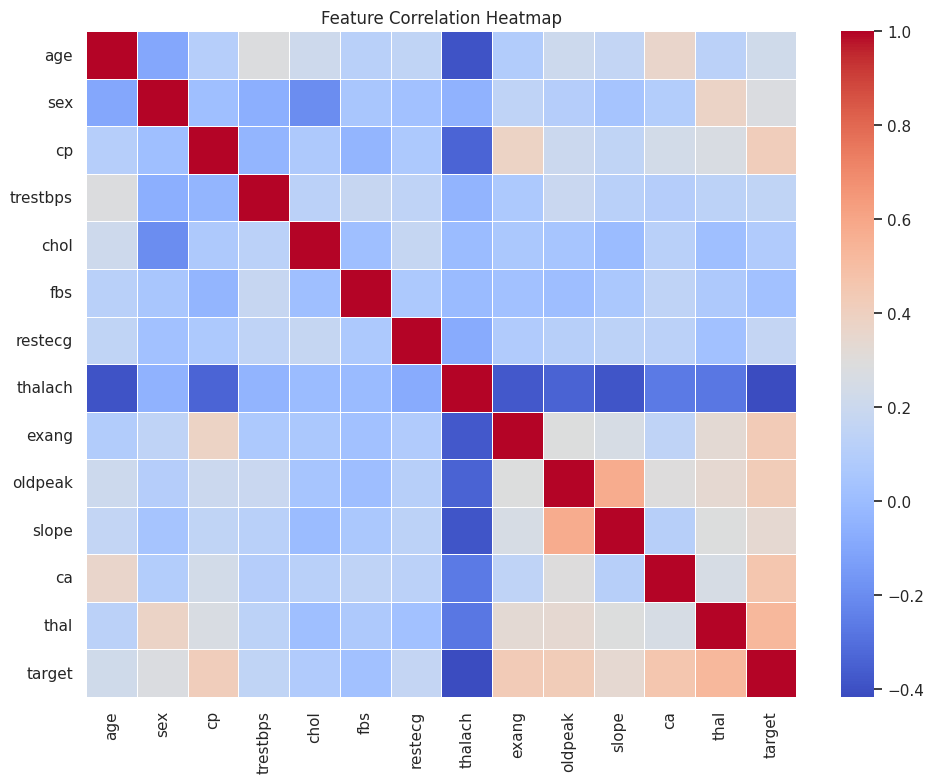

/tmp/ipython-input-3521493246.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


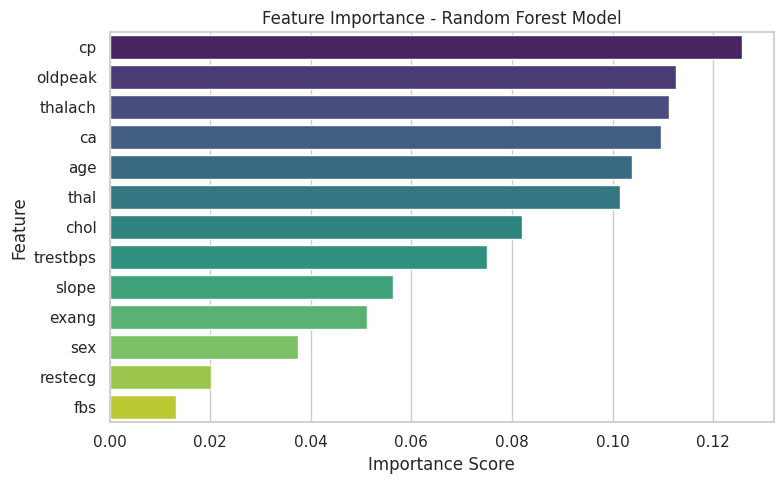


Final System Status: Success. Model Accuracy: 90.16%


In [42]:
if __name__ == "__main__":
    # 1. Load
    raw_data = load_data()

    # 2. Transform
    clean_data = transform_data(raw_data)

    # --- YOUR STEP 4: Call visualization in the pipeline ---
    visualize_data(clean_data)
    # -------------------------------------------------------

    # 3. Train
    final_accuracy = train_model(clean_data)

    print(f"\nFinal System Status: Success. Model Accuracy: {final_accuracy*100:.2f}%")